In [22]:
# OPTIONAL: Load the "autoreload" eX_orig[alias]tension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import umap
import seaborn as sns
from scipy import stats
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt

from src.util import calculate_difference_to_controls


In [24]:
Xall = pkl.load(open("artifacts/combined_profiles.pkl", 'rb'))
Xall.head()

lumc_category                                       Deletion 0bp microhomology  \
                                            Gene                                 
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                     0.181376   
                                            Actr8                     0.190534   
                                            Aicda                     0.184504   
                                            Alkbh2                    0.189304   
                                            Alyref                    0.191016   

lumc_category                                       Deletion 1bp microhomology  \
                                            Gene                                 
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                     0.369397   
                                            Actr8                     0.373348   
                                            Aicda                     0.364239   
                                            Alkbh2                    0.356852   
                                            Alyref                    0.374723   

lumc_category                                       Deletion 2bp microhomology  \
                                            Gene                                 
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                     0.039925   
                                            Actr8                     0.049253   
                                            Aicda                     0.056348   
                                            Alkbh2                    0.054539   
                                            Alyref                    0.045271   

lumc_category                                       Deletion with insertion  \
                                            Gene                              
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                  0.170009   
                                            Actr8                  0.166768   
                                            Aicda                  0.172529   
                                            Alkbh2                 0.170885   
                                            Alyref                 0.174916   

lumc_category                                       Homology Directed Repair  \
                                            Gene                               
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                   0.048849   
                                            Actr8                   0.049737   
                                            Aicda                   0.049311   
                                            Alkbh2                  0.051923   
                                            Alyref                  0.048147   

lumc_category                                       Any Insertion  \
                                            Gene                    
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5        0.160807   
                                            Actr8        0.144000   
                                            Aicda        0.138997   
                                            Alkbh2       0.140536   
                                            Alyref       0.135741   

lumc_category                                       Deletion 3+bp microhomology  
                                            Gene                                 
K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1 Actr5                      0.029638  
                                            Actr8                      0.026359  
                                            Aicda                      0.034072  
                                            Alkbh2                     0.035961  
                                            Alyref                     0.030186

In [25]:
psuedo_controls = pkl.load(open("artifacts/psuedo_controls.pkl", 'rb'))
psuedo_controls["MB01"][:5]

['Topors', 'Shprh', 'Mta2', 'Dhx8', 'Pif1']

(644, 7)
(60, 7)
(322, 14)
(14,)
(322, 14)
Done.
(644, 7)
(60, 7)
(322, 14)
(14,)
(322, 14)
Done.
(644, 7)
(60, 7)
(322, 14)
(14,)
(322, 14)
Done.
(644, 7)
(60, 7)
(322, 14)
(14,)
(322, 14)
Done.


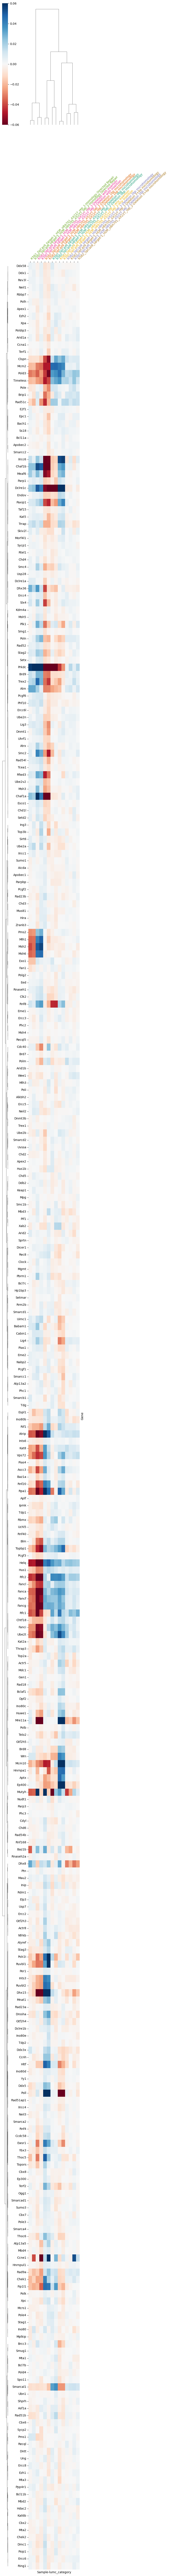

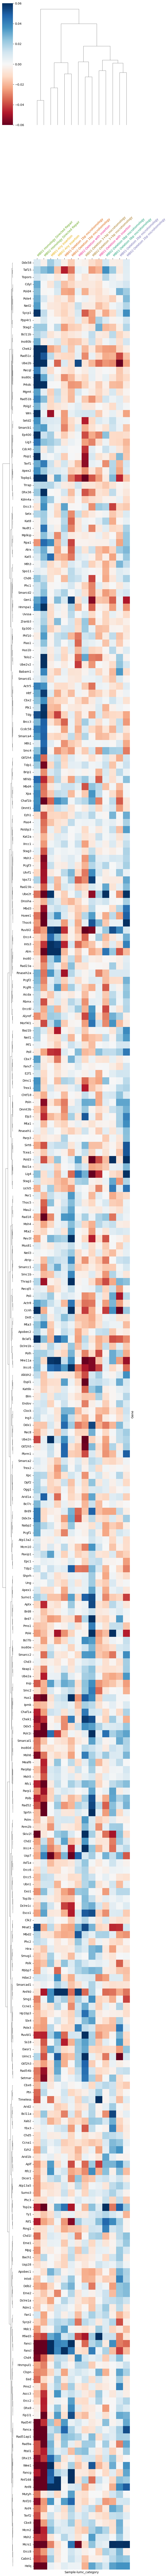

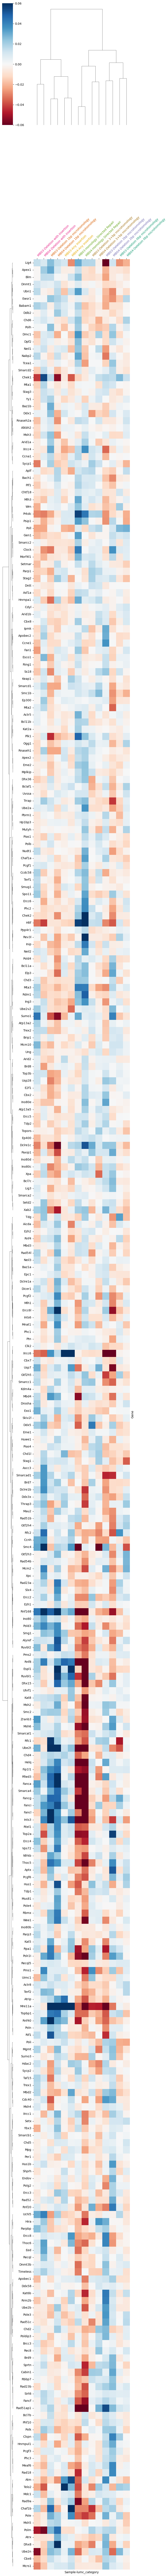

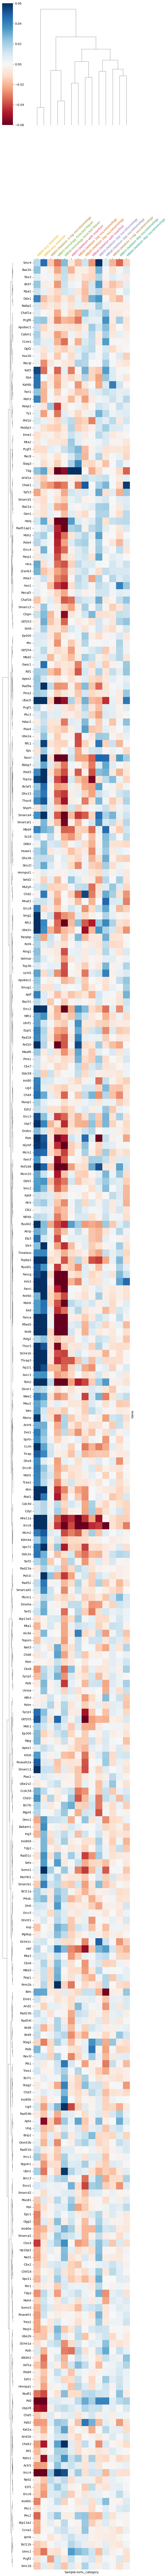

In [29]:
k = {
    "Adamson_T1" : ["K562_SpCas9_target-1_HDR_oBA701_AX227_rep_1", "K562_SpCas9_target-1_HDR_oBA701_AX227_rep_2"], 
    "T1" : ["MB01", "MB02"],
    "T2" : ["MB03", "MB04"],
    "T3" : ["MB05", "MB06"]
}

for a in k:
    # Xall = d.loc[a].reset_index()
    # Xall["Sample"] = a
    # Xall = Xall.set_index(["Sample", "Gene"])
    Xdiff = calculate_difference_to_controls(Xall, psuedo_controls["Combined"], k[a])

    pal = sns.color_palette('Dark2', Xdiff.columns.get_level_values("lumc_category").unique().shape[0])
    lut = dict(zip(Xdiff.columns.get_level_values("lumc_category").unique(), pal))
    col_colors = Xdiff.columns.get_level_values("lumc_category").to_series().map(lut)

    cg = sns.clustermap(Xdiff, metric="correlation", method="ward", figsize=(8, 120), center=0, dendrogram_ratio=(.1, .05), cmap="RdBu", vmax=0.06, vmin=-0.06, cbar_pos=(0, .9, .01, .1))
    cg.ax_heatmap.yaxis.tick_left()
    cg.ax_heatmap.xaxis.tick_top()

    for i, tick_label in enumerate(cg.ax_heatmap.axes.get_yticklabels()):
        tick_text = tick_label.get_text()
        # tick_label.set_color(row_colors[tick_text])
        tick_label.set_rotation(0)

    for i, tick_label in enumerate(cg.ax_heatmap.axes.get_xticklabels()):
        tick_text = tick_label.get_text().rsplit("-", 1)[1]
        tick_label.set_color(lut[tick_text])
        tick_label.set_rotation(45)
        tick_label.set_ha("left")
    plt.tight_layout()
    print("Done.")
    plt.savefig("artifacts/{}_hierarchical_clustering.pdf".format(a))

In [ ]:
Xdiff = calculate_difference_to_controls(Xall, psuedo_controls["Combined"], Xall.index.unique(level=0))

pal = sns.color_palette('Dark2', Xdiff.columns.get_level_values("lumc_category").unique().shape[0])
lut = dict(zip(Xdiff.columns.get_level_values("lumc_category").unique(), pal))
col_colors = Xdiff.columns.get_level_values("lumc_category").to_series().map(lut)

cg = sns.clustermap(Xdiff, metric="correlation", method="ward", figsize=(15, 90), center=0, dendrogram_ratio=(.1, .05), cmap="RdBu", vmax=0.06, vmin=-0.06, cbar_pos=(0, .9, .01, .1))
cg.ax_heatmap.yaxis.tick_left()
cg.ax_heatmap.xaxis.tick_top()

for i, tick_label in enumerate(cg.ax_heatmap.axes.get_yticklabels()):
    tick_text = tick_label.get_text()
    # tick_label.set_color(row_colors[tick_text])
    tick_label.set_rotation(0)

for i, tick_label in enumerate(cg.ax_heatmap.axes.get_xticklabels()):
    tick_text = tick_label.get_text().rsplit("-", 1)[1]
    tick_label.set_color(lut[tick_text])
    tick_label.set_rotation(45)
    tick_label.set_ha("left")
plt.tight_layout()
print("Done.")
plt.savefig("artifacts/combined_hierarchical_clustering.pdf")

Exception: 
        X should be the following format:
        Index should be two levels, first level is the replicate/targetsite. Second level is the gene.
        Columns should be a single level, with the mutation type
        